# <u>Knapsack Problem</u> 

# MAIN

In [1]:
import sys
import time
import math
import random
import numpy as np
from decimal import *
from scipy.stats import beta
from operator import itemgetter
import matplotlib.pyplot as plt

############## CONSTANT ##############
        
        ####### ALGO #######
BRUTE_FORCE = "BRUTE FORCE"

DYNAMIC_PROG = "DYNAMIC PROG"
DYNAMIC_PROG_TOP_DOWN = "DYNAMIC PROG TOP DOWN"

GREEDY_FRACTIONAL = "GREEDY FRACTIONAL"
GREEDY_WEIGHT = "GREEDY WEIGHT"
GREEDY_VALUE = "GREEDY VALUE"
GREEDY_RATIO = "GREEDY RATIO"

BRANCH_BOUND = "BRANCH BOUND"

GENETIC = "GENETIC"

FPTAS = "FPTAS"
########################################

## Global arrays
problem_solutions = []
choosed_items = []
optimal = []

# Fixing random state for reproducibility
np.random.seed(19680801)

# increase max recursion for long stack
sys.setrecursionlimit(150000)


## <span> 1. CLASS </span>

### <span style="color: yellow"> 1. Item </span>

In [2]:
class Item:
  def __init__(self, value, weight):
    self.value = value
    self.weight = weight
  
  def print(item):
    print("value = " + str(item.value) + " - weight = " + str(item.weight), end=' ')

  def print_items(items):
    for i in range(0, len(items)):
      print()
      Item.print(items[i])

#### <span style="color: GREEN"> 1. Total Weight</span>

In [3]:
def compute_total_weight(item):
    total_weight = 0
    
    for i in range(0, len(item)):
        total_weight += item[i].weight

    return total_weight

#### <span style="color: GREEN"> 2. Total Value</span>

In [4]:
def compute_total_value(item):
    total_value = 0
    
    for i in range(0, len(item)):
        total_value += item[i].value

    return total_value

### <span style="color: yellow"> 2. Solution </span>

In [5]:
class Solution:
  def __init__(self, time, name, solution):
    self.name = name
    self.time = time
    self.solution = solution
  
  def print(solution):
    print(solution.name + "\t\t - time = " + str(solution.time) + "\t - solution = " + str(solution.solution), end=' ')

  def print_solutions(solutions):
    for i in range(0, len(solutions)):
      Solution.print(solutions[i])
      print()

## <span> 2. SOURCE DATA </span>

### <span style="color: purple"> 1. input </span>

In [6]:
# Get the number of item from terminal
nb_item = int(input("Enter number of item  - max :"))

# Get the capacity of the knapsack from terminal
capacity = int(input('Enter the capacity of the sac : '))

# clear the choosed items
choosed_items = []

### <span style="color: purple"> 2. Dataset </span>

In [6]:
# clear the choosed items
choosed_items = []

# set the dataset
file1 = open('./dataset/large_scale/knapPI_1_10000_1000_1', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    data = line.split()

    if(count == 1):
        # Get the number of item from terminal
        nb_item = int(data[0])

        # Get the capacity of knapsack
        capacity = int(data[1])
        continue
    
    #if count == len(Lines): 
        #optimal = data
        #break
    #else:
    value = int(data[0])
    weight = int(data[1])

    # fill the list with the object
    choosed_items.append(Item(value, weight))

## <span> 2. GENERATOR </span>

##### <span style="color: blue"> 1. Random generator</span>

In [7]:
def random_generator():

    # generate the items randomly
    for i in range (0, nb_item):

      weight = random.randint(1, capacity)
      value = random.randint(1, capacity)
      choosed_items.append(Item(value, weight))

##### <span style="color: blue"> 2. Exponential generator</span>

In [18]:
def exponential_generator():

    # generate the items with exponential weight
    for i in range(0, nb_item):

      weight = int(math.exp(i))
      value = random.randint(1, capacity)
      choosed_items.append(Item(value, weight))

##### <span style="color: blue"> 3.Normal distribution </span>

In [12]:
def normal_distribution_generator():
  weights = np.random.normal(capacity/2, 1, size = nb_item)
  weights = list(map(int, weights))

  # generate the items with normal distribution weight
  for i in range(0, nb_item):
    
    value = random.randint(1, capacity)
    choosed_items.append(Item(value, weights[i]))

  return weights

## <span> 3. ALGORITHM </span>

##### <span style="color: red"> 1. Brute Force</span>

In [15]:
# source : https://stackoverflow.com/questions/74174950/knapsack-problem-using-brute-force-method-in-python

import itertools

# calculate the total weight of the combination 
def compute_weight(combination_items):
  value, weight = 0, 0
  
  for item in combination_items:
    weight += item.weight
    value += item.value

  return value, weight 

# Brute force algorithm
def brute_force_solution():
  max_value = 0
  solution = ()

  for i in range(len(choosed_items) + 1):

    # create all possible solutions
    for combination_items in itertools.combinations(choosed_items, i):
      value, weight = compute_weight(combination_items) 

      # check the total weight of the combination 
      if value > max_value and weight <= capacity:
        solution = combination_items
        max_value = value

  return solution

##### <span style="color: red"> 2. Dynamic Programming </span>

###### <span style="font-weight: bold"> 1. Approach seen in the exercise sheet </span>

In [7]:
# source : https://www.askpython.com/python/examples/knapsack-problem-dynamic-programming

def dynamic_programming_solution(citems):
    table = [[0 for x in range(capacity + 1)] for x in range(nb_item + 1)] 
    for i in range(nb_item + 1): 
            for j in range(capacity + 1): 
                if i == 0 or j == 0: 
                    table[i][j] = 0
                elif citems[i-1].weight <= j: 
                    table[i][j] = max(citems[i - 1].value  + table[i - 1][j - citems[i - 1].weight],  table[i - 1][j]) 
                else: 
                    table[i][j] = table[i-1][j] 
    return table[nb_item][capacity] 

Fully polynomial time approximation scheme

In [8]:
# source : https://www.geeksforgeeks.org/polynomial-time-approximation-scheme/
def fptas_solution():
    e = 0.5
    list=[]
    citems=choosed_items
    for obj in choosed_items:
        list.append(obj.value)
      
    maxVal = max(list)
    k=(maxVal*e)/nb_item
    for i in range(nb_item):
        citems[i].value=math.floor(float(choosed_items[i].value)/k)

    return dynamic_programming_solution(citems)
       

In [32]:
import random

def cmcm(capacity, choosed_items):
    vbx=0
    x=buckets = [0] * nb_item

    bestx=[0] * nb_item

    for i in range(nb_item):
      print("x",x)
      print("bestx",bestx)
      k= random.randint(0, nb_item-1)


      print("the value of =============== k",k)
      print("VBX ",vbx)

      if x[k]==0:
        x[k]=1
      else:
        x[k]=0
      newx=x
      print("newx",newx)
      cc=0
      for t in range(nb_item):
        if newx[t]==1:
          cc=cc+choosed_items[t].weight
      print("total c",cc)

      if cc<=capacity:
        x=newx
        print("x",x)
      
        vx=0
        for r in range(nb_item):
          if x[r]==1:
            vx=vx+choosed_items[r].value 
        print("vx",vx) 

        print("vbx befor",vbx)   
        pp=vbx
      
          
        vbx=0
        for r2 in range(nb_item):
            if bestx[r2]==1:
              vbx=vbx+choosed_items[r2].value
              print("vbx- pp",vbx)    


        if vx>vbx:
          for i in range(nb_item):
            bestx[i]=x[i]
            vbx=vx
          
          print("bestx comparaison avec x",bestx)
      
    return vbx


	
	


In [33]:
choosed_items=[Item(60, 10), Item(100, 20), Item(120, 30),Item(40, 10),Item(60, 20)]
print(capacity)

13


In [36]:
max_val = cmcm(50, choosed_items)
print(max_val)

x [0, 0, 0, 0, 0]
bestx [0, 0, 0, 0, 0]
the value of =============== k 0
VBX  0
newx [1, 0, 0, 0, 0]
total c 10
x [1, 0, 0, 0, 0]
vx 60
vbx befor 0
bestx comparaison avec x [1, 0, 0, 0, 0]
x [1, 0, 0, 0, 0]
bestx [1, 0, 0, 0, 0]
the value of =============== k 2
VBX  60
newx [1, 0, 1, 0, 0]
total c 40
x [1, 0, 1, 0, 0]
vx 180
vbx befor 60
vbx- pp 60
bestx comparaison avec x [1, 0, 1, 0, 0]
x [1, 0, 1, 0, 0]
bestx [1, 0, 1, 0, 0]
the value of =============== k 1
VBX  180
newx [1, 1, 1, 0, 0]
total c 60
x [1, 1, 1, 0, 0]
bestx [1, 0, 1, 0, 0]
the value of =============== k 0
VBX  180
newx [0, 1, 1, 0, 0]
total c 50
x [0, 1, 1, 0, 0]
vx 220
vbx befor 180
vbx- pp 60
vbx- pp 180
bestx comparaison avec x [0, 1, 1, 0, 0]
x [0, 1, 1, 0, 0]
bestx [0, 1, 1, 0, 0]
the value of =============== k 2
VBX  220
newx [0, 1, 0, 0, 0]
total c 20
x [0, 1, 0, 0, 0]
vx 100
vbx befor 220
vbx- pp 100
vbx- pp 220
220


###### <span style="font-weight: bold"> 2. Top down approach </span>

In [8]:
# source : https://helloacm.com/teaching-kids-programming-0-1-knapsack-problem-via-top-down-dynamic-programming-algorithm/

from functools import cache

def dynamic_top_down_solution():

    @cache
    def dynamic_top_down_solution_rec(i, c):
        if i < 0: return 0
        
        solution = 0
        if c >= choosed_items[i].weight:
            solution = max(solution, dynamic_top_down_solution_rec(i - 1, c - choosed_items[i].weight) + choosed_items[i].value)
        
        solution = max(solution, dynamic_top_down_solution_rec(i - 1, c))
        return solution

    return dynamic_top_down_solution_rec(nb_item - 1, capacity)

ImportError: cannot import name 'cache' from 'functools' (c:\Users\HP\Anaconda3\lib\functools.py)

##### <span style="color: red"> 3. Greedy approach </span>

###### <span style="font-weight: bold"> 1. Greedy ratio </span>

In [9]:
# source : https://www.geeksforgeeks.org/fractional-knapsack-problem/
def greedy_ratio_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: (x.value/x.weight), reverse=True)
    
    initial_capacity = capacity
    finalvalue = 0.0

    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            finalvalue += item.value

    # Returning final value
    return finalvalue

###### <span style="font-weight: bold"> 2. Greedy weight </span>

In [10]:
def greedy_weight_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: x.weight, reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0

    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

    return final_value

###### <span style="font-weight: bold"> 3. Greedy value </span>

In [11]:
def greedy_value_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: x.value, reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0

    # Looping through all Items
    for item in sorted_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

    return final_value

###### <span style="font-weight: bold"> 4. Greedy fractional </span>

In [12]:
def greedy_fractional_solution():

    sorted_items = choosed_items
    sorted_items.sort(key=lambda x: (x.value/x.weight), reverse=True)
    
    initial_capacity = capacity
    final_value = 0.0
    
    # Looping through all Items
    for item in choosed_items:

        if item.weight <= initial_capacity:
            initial_capacity -= item.weight
            final_value += item.value

        else:
            final_value += item.value * capacity / item.weight
            break

    return final_value

#### <span style="color: red"> 4. Branch and bound </span>

In [10]:
# source : https://github.com/NateRice/0-1_Knapsack/blob/master/0-1Knapsack_keep_track_of_items.py

class Priority_Queue:
    def __init__(self):
        self.pqueue = []
        self.length = 0

    def insert(self, node, p_per_weight, sorted_items):
        for i in self.pqueue:
            get_bound(i, p_per_weight, sorted_items)
        i = 0
        while i < len(self.pqueue):
            if self.pqueue[i].bound > node.bound:
                break
            i += 1
        self.pqueue.insert(i, node)
        self.length += 1

    def print_pqueue(self):
        for i in list(range(len(self.pqueue))):
            print("pqueue", i, "=", self.pqueue[i].bound)

    def remove(self):
        try:
            result = self.pqueue.pop()
            self.length -= 1
        except:
            print("Priority queue is empty, cannot pop from empty list.")
        else:
            return result

class Node:
    def __init__(self, level, profit, weight):
        self.level = level
        self.profit = profit
        self.weight = weight
        self.items = []
        self.bound = 0


def get_bound(node, p_per_weight, sorted_items):
    if node.weight >= capacity:
        return 0
    else:
        result = node.profit
        j = node.level + 1
        totweight = node.weight
        while j <= nb_item-1 and totweight + sorted_items[j].weight <= capacity:
            totweight = totweight + sorted_items[j].weight
            result = result + choosed_items[j].value
            j += 1
        k = j
        if k <= nb_item-1:
            result = result + (capacity - totweight) * p_per_weight[k]

        return result

def branch_bound_solution():

    # initialize
    p_per_weight = []
    sorted_items = choosed_items

    for item in choosed_items:
        p_per_weight.append(item.value/item.weight)

    sorted_items.sort(key=lambda x: (x.value/x.weight))
    p_per_weight = sorted(p_per_weight)
    
    nodes_generated = 0
    pq = Priority_Queue()

    v = Node(-1, 0, 0) # v initialized to be the root with level = 0, profit = $0, weight = 0
    nodes_generated+=1
    max_profit = 0 # max_profit initialized to $0
    v.bound = get_bound(v, p_per_weight, sorted_items)
    pq.insert(v, p_per_weight, sorted_items)

    while pq.length != 0:
        
        v = pq.remove() #remove node with best bound
        if v.bound > max_profit: #check if node is still promising
            #set u to the child that includes the next item
            u = Node(0, 0, 0)
            nodes_generated += 1
            u.level = v.level + 1
            u.profit = v.profit + sorted_items[u.level].value
            u.weight = v.weight + sorted_items[u.level].weight
            
            #take v's list and add u's list
            u.items = v.items.copy()
            u.items.append(u.level) # adds next item

            if u.weight <= capacity and u.profit > max_profit: 
                #update max_profit
                max_profit = u.profit
                bestitems = u.items
                u.bound = get_bound(u, p_per_weight, sorted_items)
    
            if u.bound > max_profit:
                pq.insert(u, p_per_weight, sorted_items)
    
            #set u to the child that does not include the next item
            u2 = Node(u.level, v.profit, v.weight)
            nodes_generated+=1
            u2.bound = get_bound(u2, p_per_weight, sorted_items)
            u2.items = v.items.copy()
    
            if u2.bound > max_profit:
                pq.insert(u2, p_per_weight, sorted_items)
    
    return max_profit
    
    # print("\nEND maxprofit = ", maxprofit, "nodes generated = ", nodes_generated)
    # print("bestitems = ", bestitems)

##### <span style="color: red"> 5. Genetic Solution </span>

In [ ]:
# source : https://github.com/Pantzan/KnapsackGA

import random
import operator

class Genetic(object):

	#initialize variables and lists
	def __init__(self):	

		self.C = 0
		self.weights = []
		self.profits = []
		self.opt = []
		self.parents = []
		self.newparents = []
		self.bests = []
		self.best_p = [] 
		self.iterated = 1
		self.population = 0

	# create the initial population 
	def initialize(self):

		for i in range(self.population):
			parent = []
			for k in range(0, 5):
				k = random.randint(0, 1)
				parent.append(k)
			self.parents.append(parent)

	# set the details of this problem
	def properties(self, weights, profits, opt, C, population):

		self.weights = weights
		self.profits = profits
		self.opt = opt
		self.C = C
		self.population = population
		self.initialize()

	# calculate the fitness function of each list (sack)
	def fitness(self, item):

		sum_w = 0
		sum_p = 0

		# get weights and profits
		for index, i in enumerate(item):
			print(index)
			print(item)
			if i == 0:
				continue
			else:
				sum_w += self.weights[index]
				sum_p += self.profits[index]

		# if greater than the optimal return -1 or the number otherwise
		if sum_w > self.C:
			return -1
		else: 
			return sum_p
	
	# run generations of GA
	def evaluation(self):

		# loop through parents and calculate fitness
		best_pop = self.population // 2
		for i in range(len(self.parents)):
			parent = self.parents[i]
			ft = self.fitness(parent)
			self.bests.append((ft, parent))

		# sort the fitness list by fitness		
		self.bests.sort(key=operator.itemgetter(0), reverse=True)
		self.best_p = self.bests[:best_pop]
		self.best_p = [x[1] for x in self.best_p]

	# mutate children after certain condition
	def mutation(self, ch):

		for i in range(len(ch)):		
			k = random.uniform(0, 1)
			if k > 0.5:
				#if random float number greater that 0.5 flip 0 with 1 and vice versa
				if ch[i] == 1:
					ch[i] = 0
				else: 
					ch[i] = 1
		return ch

	# crossover two parents to produce two children by miixing them under random ration each time
	def crossover(self, ch1, ch2):

		threshold = random.randint(1, len(ch1)-1)
		tmp1 = ch1[threshold:]
		tmp2 = ch2[threshold:]
		ch1 = ch1[:threshold]
		ch2 = ch2[:threshold]
		ch1.extend(tmp2)
		ch2.extend(tmp1)

		return ch1, ch2

	# run the GA algorithm
	def run(self):

		# run the evaluation once
		self.evaluation()
		newparents = []
		pop = len(self.best_p)-1

		# create a list with unique random integers
		sample = random.sample(range(pop), pop)
		for i in range(0, pop):
			# select the random index of best children to randomize the process
			if i < pop-1:
				r1 = self.best_p[i]
				r2 = self.best_p[i+1]
				nchild1, nchild2 = self.crossover(r1, r2)
				newparents.append(nchild1)
				newparents.append(nchild2)
			else:
				r1 = self.best_p[i]
				r2 = self.best_p[0]
				nchild1, nchild2 = self.crossover(r1, r2)
				newparents.append(nchild1)
				newparents.append(nchild2)

		# mutate the new children and potential parents to ensure global optima found
		for i in range(len(newparents)):
			newparents[i] = self.mutation(newparents[i])

		if self.opt in newparents:
			print ("optimal found in {} generations" .format(self.iterated))
		else:
			self.iterated += 1
			print("recreate generations for {} time" .format(self.iterated))
			self.parents = newparents
			self.bests = []
			self.best_p = []
			self.run()	

## <span> 4. TEST  </span>

### <span style="color: grey"> Clear Choosed Items  </span>

In [1]:
choosed_items = []

In [13]:
def draw_graph():
    sorted_items = choosed_items
    # sorted_items.sort(key=lambda x: x.weight)

    x, y = [], []
    for i in range (0, len(sorted_items)):
        x.append(i)
        y.append(sorted_items[i].weight)
        
    # plotting the points
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('x - items')
    # naming the y axis
    plt.ylabel('y - weight')

    # function to show the plot
    plt.show()

### <span style="color: grey"> 1. Generator </span>

#### <span style="color: #DDDD"> 1. Random </span>

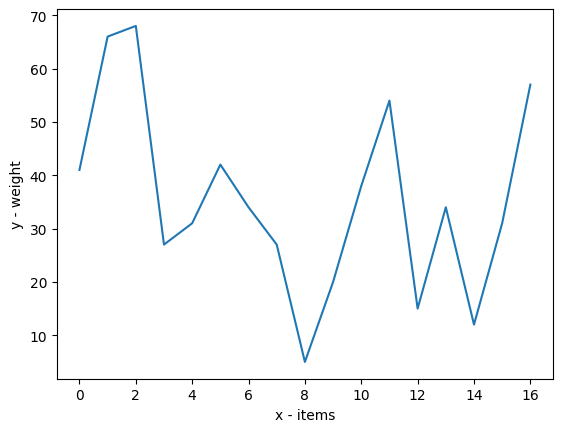

In [14]:
random_generator()
draw_graph()

#### <span style="color: #DDDD"> 2. Exponential </span>

In [ ]:
exponential_generator()
draw_graph()

#### <span style="color: #DDDD"> 3. Normal distribution </span>

In [ ]:
normal = normal_distribution_generator()
# plt.hist(normale, 50)
# plt.show()


#### <span style="color: #DDDD"> 4. Uploaded Dataset </span>

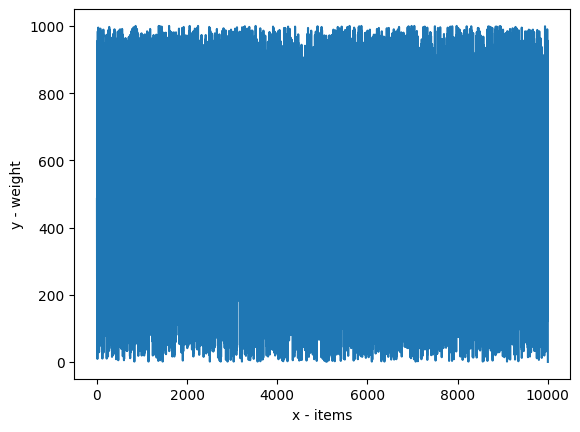

In [12]:
draw_graph()

### <span style="color: grey"> 3. Brute force</span>

In [ ]:
def brute_force_test():
    
    begin = time.time()
    solution = brute_force_solution()
    end = time.time()

    problem_solutions.append(Solution((end - begin), BRUTE_FORCE, compute_total_value(solution)))

    print("brute force = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution brute force = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

brute_force_test()

### <span style="color: grey"> 4. Dynamic programming</span>

#### <span style="color: #dddd"> 1. exercise sheet </span>

In [16]:
def dynamic_programming_test():

    begin = time.time()
    solution = dynamic_programming_solution(choosed_items)
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, DYNAMIC_PROG, solution))

    print("dynamic = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")
    
dynamic_programming_test()

dynamic = 0.00843358039855957 secondes
solution = 295
---


#### <span style="color: #dddd"> 2. top down approach</span>

In [ ]:
def dynamic_top_down_test():

    begin = time.time()
    solution = dynamic_top_down_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, DYNAMIC_PROG_TOP_DOWN, solution))

    print("dynamic top-down = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")
    
dynamic_top_down_test()

### <span style="color: grey"> 5. Greedy solution</span>

#### <span style="color: #dddd"> 1. value solution</span>

In [17]:
def greedy_value_test():
    
    begin = time.time()
    solution = greedy_value_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_VALUE, solution))

    print("greedy value = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_value_test()

greedy value = 2.6941299438476562e-05 secondes
solution = 288.0
---


#### <span style="color: #dddd"> 2. weight solution</span>

In [ ]:
def greedy_weight_test():
    
    begin = time.time()
    solution = greedy_weight_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_VALUE, solution))

    print("greedy weight = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_weight_test()

#### <span style="color: #dddd"> 3. ratio solution</span>

In [18]:
def greedy_ratio_test():
    begin = time.time()
    solution = greedy_ratio_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_RATIO, solution))

    print("greedy ratio = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_ratio_test()

NameError: name 'greedy_ratio_solution' is not defined

#### <span style="color: #dddd"> 3. Fractional solution</span>

In [17]:
def greedy_fractional_test():

    begin = time.time()
    solution = greedy_fractional_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, GREEDY_FRACTIONAL, solution))

    print("greedy fractional = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

greedy_fractional_test()

greedy fractional = 0.0010998249053955078 secondes
solution = 81393.0
---


### <span style="color: grey"> 6. Branch & bound</span>

In [18]:
def branch_bound_test():

    begin = time.time()
    solution = branch_bound_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, BRANCH_BOUND, solution))

    print("branch bound = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

branch_bound_test()

branch bound = 0.00022125244140625 secondes
solution = 243
---


### <span style="color: grey"> 7. Genetic </span>

In [ ]:
k = Genetic()
values, weights = [], []
print("je suis la")
for item in (choosed_items):
	weights.append(item.weight)
	values.append(item.value)

print(weights)
print("------")
print(values)

optimal = list(map(int, optimal))
k.properties(weights, values, optimal, capacity, nb_item * 2)

solution = 0
for i in range(0, len(optimal)):
	if optimal[i] == 1:
		solution += choosed_items[i].value

print("--->" + str(solution))
print("==> " + str(optimal))

begin = time.time()
k.run()
end = time.time()

duration = (end - begin)
problem_solutions.append(Solution(duration, GENETIC, solution))

print("branch bound = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
print("---")

### <span style="color: grey"> 8. FPTAS</span>

In [19]:
def fptas_test():

    begin = time.time()
    solution = fptas_solution()
    end = time.time()

    duration = (end - begin)
    problem_solutions.append(Solution(duration, FPTAS, solution))

    print("fptas = %s secondes" % problem_solutions[len(problem_solutions) - 1].time)
    print("solution = " + str(problem_solutions[len(problem_solutions) - 1].solution))
    print("---")

fptas_test()

fptas = 0.006113529205322266 secondes
solution = 66
---


### <span style="color: grey"> Display Solutions</span>

In [18]:
from prettytable import PrettyTable

table = PrettyTable(["Algo", "Time", "Solution"])

for solution in (problem_solutions):
    table.add_row([solution.name, str(solution.time), solution.solution])

print(table)

+--------------+-----------------------+----------+
|     Algo     |          Time         | Solution |
+--------------+-----------------------+----------+
| DYNAMIC PROG |   8.505886316299438   |  54503   |
| GREEDY VALUE | 0.0010209083557128906 | 13821.0  |
| BRANCH BOUND |   1.0617294311523438  |  54046   |
|    FPTAS     |   8.146749019622803   |  109178  |
+--------------+-----------------------+----------+


In [19]:
optimal = list(map(int, optimal))

solution = 0
for i in range(0, len(optimal)):
	if optimal[i] == 1:
		solution += choosed_items[i].value

print("--->" + str(solution))

--->79754


### <span style="color: grey"> Clear Solutions</span>

In [19]:
problem_solutions = []